In [10]:
# 啟動 Chrome 必須先下載 Chrome 驅動器(https://sites.google.com/chromium.org/driver/)
# 將 Chrome 驅動器放置同路徑下，或設定於系統環境變數中的 Path
# driver = webdriver.Chrome('chromedriver.exe')
# driver = webdriver.Chrome()
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from base64 import b64decode


driver = webdriver.Chrome(ChromeDriverManager().install())

driver.get("https://gartic.io/")

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 102.0.5005
[WDM] - Get LATEST chromedriver version for 102.0.5005 google-chrome
[WDM] - Driver [C:\Users\User\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache
C:\Users\User\AppData\Local\Temp\ipykernel_22040\3106278018.py:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [20]:
# 找出題目
from bs4 import BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')
titles = soup.find("div", class_="word")
print(titles.text)

獨角蟲


In [21]:
# 開啟新分頁(圖片搜尋頁面)
url1 = 'https://www.google.com.tw/imghp?hl=zh-TW&tab=ri&authuser=0&ogbl' #step1:setup url1 you want to visit in new page
strScript = 'window.open("'+url1+'");'
driver.execute_script(strScript)
driver.switch_to.window(driver.window_handles[1])
driver.find_element_by_class_name("gLFyf.gsfi").send_keys(titles.text)
driver.find_element_by_class_name("Tg7LZd").click()

C:\Users\User\AppData\Local\Temp\ipykernel_22040\2468387551.py:6: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  driver.find_element_by_class_name("gLFyf.gsfi").send_keys(titles.text)
C:\Users\User\AppData\Local\Temp\ipykernel_22040\2468387551.py:7: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  driver.find_element_by_class_name("Tg7LZd").click()


C:\Users\User\AppData\Local\Temp\ipykernel_22040\427644872.py:4: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  test_img = driver.find_element_by_xpath('//*[@id="islrg"]/div[1]/div[' +str(i) + ']/a[1]/div[1]/img')


''
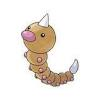

In [23]:
soup2 = BeautifulSoup(driver.page_source, 'html.parser')
temp = soup2.find_all('img')
for i in range (1,10):
    test_img = driver.find_element_by_xpath('//*[@id="islrg"]/div[1]/div[' +str(i) + ']/a[1]/div[1]/img')
temp[3]["src"]

In [17]:
print(test_img)

<selenium.webdriver.remote.webelement.WebElement (session="316e22a6770caabab6cb8e3d6e7b604c", element="71bc85e0-6ec0-413e-9355-72b293bd33a0")>


In [15]:
# temp[3]以前都怪怪的，3以後都可以
header, encoded = temp[3]["src"].split(",", 1)
data = b64decode(encoded)

with open("image.png", "wb") as f:
    f.write(data)

In [14]:
# 切回原本頁面(遊戲頁面)
driver.switch_to.window(driver.window_handles[0])

In [8]:
# 程式暫停直到成為繪畫者
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
wait = WebDriverWait(driver,10,0.5)
element = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"hint")))

driver.quit()